# Outpainting using black-forest-labs/flux-fill-pro

<a target="_blank" href="https://colab.research.google.com/github/simonguest/CS-394/blob/main/src/04/notebooks/outpainting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://github.com/simonguest/CS-394/raw/refs/heads/main/src/04/notebooks/outpainting.ipynb">
  <img src="https://img.shields.io/badge/Download_.ipynb-blue" alt="Download .ipynb"/>
</a>

In [ ]:
!uv pip install replicate

## Set Replicate API Token

In [ ]:
import sys
import os
from dotenv import load_dotenv

if 'google.colab' in sys.modules:
  from google.colab import userdata # type:ignore
  os.environ['REPLICATE_API_TOKEN'] = userdata.get('REPLICATE_API_TOKEN')
  print("Replicate API Token set for Colab")
else:
  load_dotenv()
  print("Loaded env vars from .env")

## Input Image

In [1]:
from IPython.display import Image

INPUT_IMAGE = "https://raw.githubusercontent.com/simonguest/CS-394/refs/heads/main/src/04/images/campus.png"

Image(url=INPUT_IMAGE)

## Call black-forest-labs/flux-fill-pro with outpainting parameters

In [8]:
import replicate

# Call the Replicate API
output = replicate.run(
    "black-forest-labs/flux-fill-pro",
    input={
        "image": INPUT_IMAGE,
        "prompt": "The main building of a technical college, no text",
        "seed": 123456,
        "steps": 50,
        "guidance": 60,
        "outpaint": "Zoom out 2x",
        "output_format": "jpg",
        "safety_tolerance": 2,
        "prompt_upsampling": False
    }
)

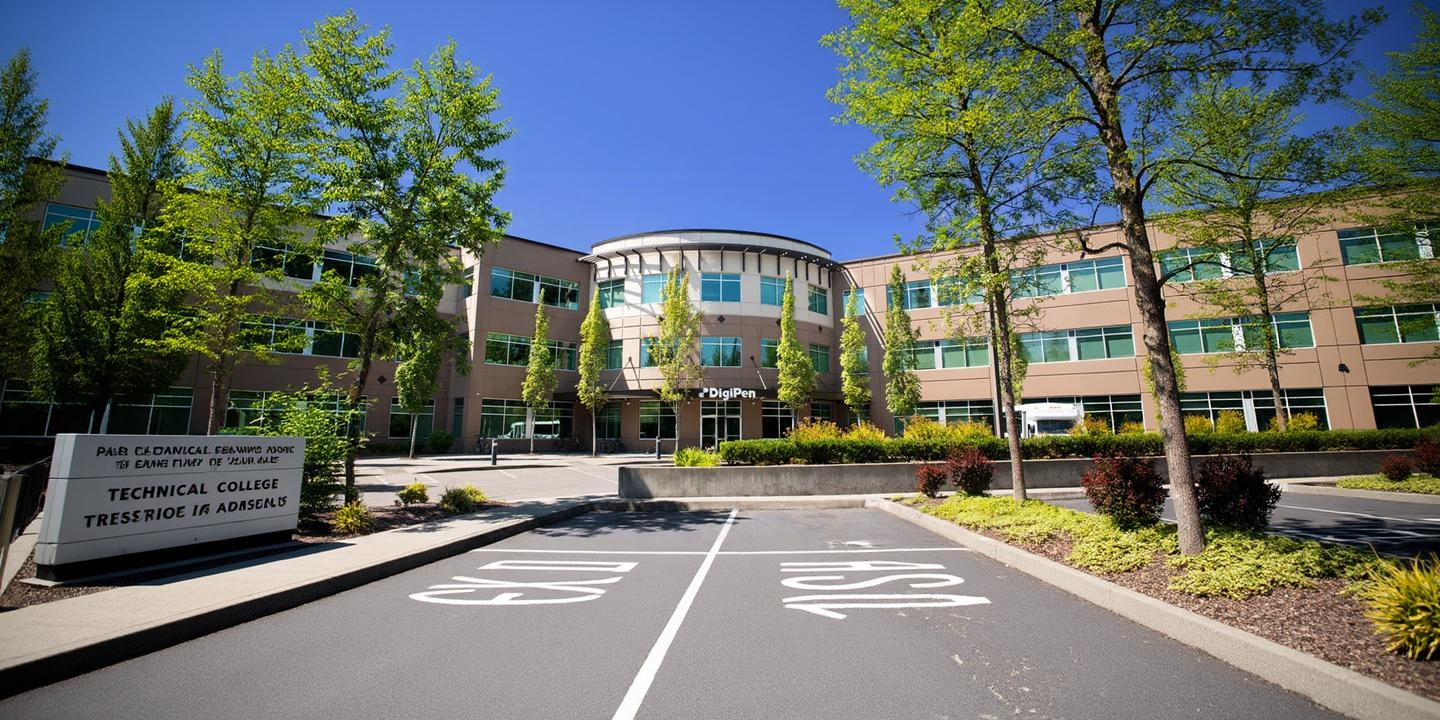

In [9]:
import io
from PIL import Image

output_bytes = io.BytesIO(output.read())
output_image = Image.open(output_bytes)
output_image